In [1]:
import nltk 
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
from nltk.corpus import names 

print (names.words()[:10])

['Abagael', 'Abagail', 'Abbe', 'Abbey', 'Abbi', 'Abbie', 'Abby', 'Abigael', 'Abigail', 'Abigale']


In [3]:
print( len(names.words()))

7944


In [4]:
from nltk.tokenize import word_tokenize

sent = 'I am reading a book. It is Python Machine Learning By Example, 3rd edition.'

In [5]:
print( word_tokenize(sent))

['I', 'am', 'reading', 'a', 'book', '.', 'It', 'is', 'Python', 'Machine', 'Learning', 'By', 'Example', ',', '3rd', 'edition', '.']


In [6]:
sent2 = 'I have been to U.K. and U.S.A.'
print( word_tokenize(sent2))

['I', 'have', 'been', 'to', 'U.K.', 'and', 'U.S.A', '.']


In [7]:
from nltk.tokenize import sent_tokenize
print ( sent_tokenize(sent))


['I am reading a book.', 'It is Python Machine Learning By Example, 3rd edition.']


In [8]:
import nltk
tokens = word_tokenize(sent)
print (nltk.pos_tag(tokens))

[('I', 'PRP'), ('am', 'VBP'), ('reading', 'VBG'), ('a', 'DT'), ('book', 'NN'), ('.', '.'), ('It', 'PRP'), ('is', 'VBZ'), ('Python', 'NNP'), ('Machine', 'NNP'), ('Learning', 'NNP'), ('By', 'IN'), ('Example', 'NNP'), (',', ','), ('3rd', 'CD'), ('edition', 'NN'), ('.', '.')]


In [9]:
import nltk

# Display information about the 'PRP' and 'VBP' tags
nltk.help.upenn_tagset('PRP')
nltk.help.upenn_tagset('VBP')

PRP: pronoun, personal
    hers herself him himself hisself it itself me myself one oneself ours
    ourselves ownself self she thee theirs them themselves they thou thy us
VBP: verb, present tense, not 3rd person singular
    predominate wrap resort sue twist spill cure lengthen brush terminate
    appear tend stray glisten obtain comprise detest tease attract
    emphasize mold postpone sever return wag ...


In [10]:
import spacy 

#load english model
nlp = spacy.load('en_core_web_sm')

text = 'man suffers more in imagination than in reality - Seneca'
docs = nlp(text)
print([(token.text, token.pos_ ) for token in docs ])

[('man', 'NOUN'), ('suffers', 'VERB'), ('more', 'ADJ'), ('in', 'ADP'), ('imagination', 'NOUN'), ('than', 'ADP'), ('in', 'ADP'), ('reality', 'NOUN'), ('-', 'PUNCT'), ('Seneca', 'NOUN')]


In [11]:
token3 = nlp('The book written by Hayden Liu in 2020 was sold at $30 in America')
print( [(token.text, token.label_) for token in token3.ents])

[('Hayden Liu', 'PERSON'), ('2020', 'DATE'), ('30', 'MONEY'), ('America', 'GPE')]


In [12]:
from nltk.stem.porter import PorterStemmer

porter_stemmer = PorterStemmer()
porter_stemmer.stem('machines')

'machin'

In [13]:
porter_stemmer.stem('learning')

'learn'

In [14]:
from nltk.stem import WordNetLemmatizer
import time 
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize('machines')
time.sleep(1)
lemmatizer.lemmatize('learning')


'learning'

In [15]:
lemmatizer.lemmatize('machines')

'machine'

In [16]:
from sklearn.datasets import fetch_20newsgroups

In [17]:
groups = fetch_20newsgroups()


In [18]:
groups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [19]:
groups['target_names']


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [20]:
groups.target

array([7, 4, 4, ..., 3, 1, 8])

In [21]:
import numpy as np 
np.unique(groups.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

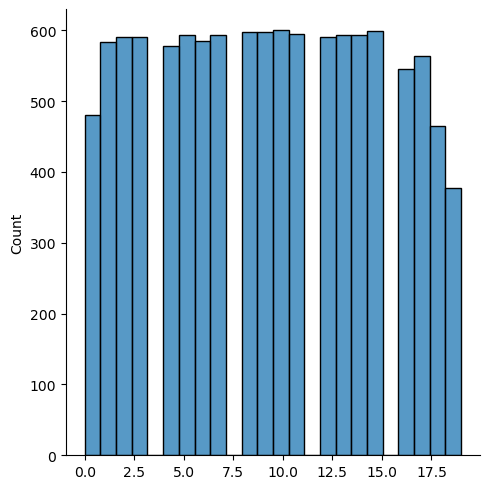

In [22]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.displot(groups.target)
plt.show()

In [23]:
groups.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [24]:
groups.target[0]
groups.target_names[groups.target[0]]

'rec.autos'

In [25]:
groups.target[0]

7

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer(max_features=500)
data_count = count_vector.fit_transform(groups.data)
data_count.shape

(11314, 500)

In [27]:
data_count[1]

<1x500 sparse matrix of type '<class 'numpy.int64'>'
	with 45 stored elements in Compressed Sparse Row format>

In [28]:
data_count.toarray()

array([[0, 0, 0, ..., 0, 2, 1],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [29]:
data_count[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0,
        0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [30]:
print(count_vector.get_feature_names_out())

['00' '000' '10' '100' '11' '12' '13' '14' '145' '15' '16' '17' '18' '19'
 '1993' '20' '21' '22' '23' '24' '25' '26' '27' '30' '32' '34' '40' '50'
 '93' 'a86' 'able' 'about' 'above' 'ac' 'access' 'actually' 'address'
 'after' 'again' 'against' 'ago' 'all' 'already' 'also' 'always' 'am'
 'american' 'an' 'and' 'andrew' 'another' 'answer' 'any' 'anyone'
 'anything' 'apple' 'apr' 'april' 'are' 'armenian' 'around' 'article' 'as'
 'ask' 'at' 'au' 'available' 'away' 'ax' 'b8f' 'back' 'bad' 'based' 'be'
 'because' 'been' 'before' 'being' 'believe' 'best' 'better' 'between'
 'bible' 'big' 'bill' 'bit' 'book' 'both' 'but' 'buy' 'by' 'ca' 'call'
 'called' 'came' 'can' 'canada' 'cannot' 'car' 'card' 'case' 'cc' 'center'
 'change' 'children' 'chip' 'christian' 'clipper' 'co' 'code' 'color'
 'com' 'come' 'computer' 'control' 'could' 'course' 'cs' 'current' 'data'
 'david' 'day' 'days' 'de' 'department' 'did' 'didn' 'different' 'disk'
 'distribution' 'do' 'does' 'doesn' 'doing' 'don' 'done' 'dos' 'do

In [31]:
data_cleaned = []
for _ in groups.data:
    cleaned_text = ' '.join(word for word in _.split() if word.isalpha())
    data_cleaned.append(cleaned_text)

In [32]:
from sklearn.feature_extraction import _stop_words

print(_stop_words.ENGLISH_STOP_WORDS)

frozenset({'please', 'whatever', 'themselves', 'so', 'whereafter', 'forty', 'whereas', 'fill', 'empty', 'thin', 'becomes', 'it', 'someone', 'under', 'front', 'will', 'between', 'might', 'seems', 'nevertheless', 'eight', 'anyone', 'amoungst', 'detail', 'further', 'yourself', 'done', 'of', 'a', 'nor', 'although', 'fire', 'ten', 'before', 'whenever', 'am', 'into', 'another', 'side', 'then', 'one', 'and', 'here', 'could', 'bill', 'first', 'she', 'de', 'many', 'etc', 'otherwise', 'besides', 'bottom', 'we', 'since', 'whose', 'moreover', 'move', 'myself', 'whither', 'either', 'they', 'may', 'why', 'his', 'more', 'beside', 'beforehand', 'along', 'due', 'thereupon', 'where', 'as', 'take', 'few', 'these', 'can', 'though', 'onto', 'former', 'had', 'perhaps', 'call', 'everyone', 'who', 'to', 'none', 'any', 'never', 'has', 'interest', 'its', 'below', 'thick', 'much', 'hereafter', 'must', 'through', 'too', 'do', 'thereby', 'all', 'whereupon', 'yours', 'thereafter', 'therefore', 'should', 'sixty', 'b

In [33]:
count_vector_sw = CountVectorizer(stop_words='english',max_features= 500 )


In [34]:
from nltk.corpus import names 
all_names= set(names.words())
count_vector_sw = CountVectorizer(stop_words='english',max_features= 500 )

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
data_cleaned = []
for doc in groups.data:
    doc = doc.lower()
    doc_cleaned = ' '.join(lemmatizer.lemmatize(word) for word in doc.split() if word.isalpha() and word not in all_names)
    data_cleaned.append(doc_cleaned)
    
data_cleaned_count = count_vector_sw.fit_transform(data_cleaned) 

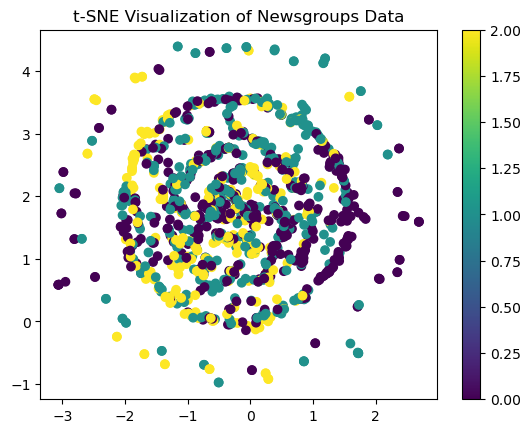

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Define categories
categories_3 = ['talk.religion.misc', 'comp.graphics', 'sci.space']

# Fetch the dataset
groups_3 = fetch_20newsgroups(categories=categories_3, remove=('headers', 'footers', 'quotes'))

# Convert the text data to a TF-IDF matrix
vectorizer = TfidfVectorizer(stop_words='english')
data_cleaned = vectorizer.fit_transform(groups_3.data)

# Apply t-SNE
tsne_model = TSNE(n_components=2, perplexity=40, random_state=42, learning_rate=500)
data_tsne = tsne_model.fit_transform(data_cleaned.toarray())

# Plot the t-SNE results
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=groups_3.target, cmap='viridis')
plt.colorbar()
plt.title("t-SNE Visualization of Newsgroups Data")
plt.show() 

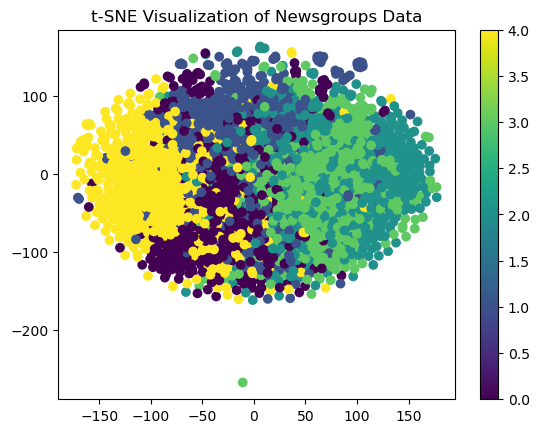

In [45]:
categories_5 = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x']
group_5 = fetch_20newsgroups(categories=categories_5, remove= ('headers', 'footers', 'quotes '))

vectorizer = TfidfVectorizer(stop_words= 'english')

data_cleaned = vectorizer.fit_transform(group_5.data)
tsne_model = TSNE(n_components=2, perplexity=40, random_state=42, learning_rate=500)
data_tsne = tsne_model.fit_transform(data_cleaned.toarray())

# Plot the t-SNE results
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=group_5.target, cmap='viridis')
plt.colorbar()
plt.title("t-SNE Visualization of Newsgroups Data")
plt.show() 
